# 다층 퍼셉트론으로 손글씨 분류하기
## 사용할 데이터

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [2]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
print(digits.target[0])

0


In [4]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))


전체 샘플의 수 : 1797


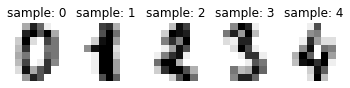

In [6]:
#상위 5개 샘플만 시각화
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [7]:
#상위 5개 샘플 레이블 확인
for i in range(5):
    print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [10]:
#digits.images는 모든 샘플을 8 × 8 행렬로 저장하고 있음
#digts.data는 64차원의 벡터로 변환해서 저장하고 있음
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [11]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

## 분류기 학습

In [12]:
import torch
import torch.nn as nn
from torch import optim

In [13]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [14]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [17]:
loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음

In [18]:
optimizer = optim.Adam(model.parameters())

In [19]:
losses = []

In [22]:
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, 100, loss.item()))

    losses.append(loss.item())

Epoch    0/100 Cost: 0.281738
Epoch   10/100 Cost: 0.237729
Epoch   20/100 Cost: 0.203228
Epoch   30/100 Cost: 0.176478
Epoch   40/100 Cost: 0.155262
Epoch   50/100 Cost: 0.137892
Epoch   60/100 Cost: 0.123714
Epoch   70/100 Cost: 0.111961
Epoch   80/100 Cost: 0.101911
Epoch   90/100 Cost: 0.093155


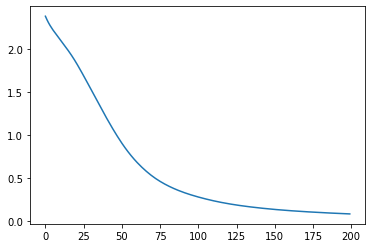

In [23]:
plt.plot(losses)

# MLP로 MNIST 분류하기
*  앞서 우리가 실습시간에 진행했던, 소프트맥스 회귀 또한 인공 신경망이라고 볼 수 있음
* 입력층과 출력층만 존재하므로 소프트맥스 함수를 활성화 함수로 사용한 '단층 퍼셉트론'임
* 이 예제에서는 은닉층을 추가로 넣어 다층 퍼셉트론을 구현하고, 딥 러닝을 통해서 MNIST 데이터를 분류함
## 1. 데이터 로드

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml

In [26]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [31]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [33]:
mnist.target = mnist.target.astype(np.int8)

In [34]:
X = mnist.data / 255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

In [38]:
X.to_numpy()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [36]:
y[0]

5

이 이미지 데이터의 레이블은 5이다


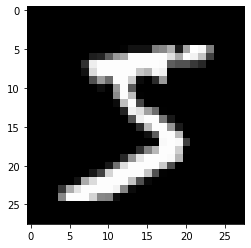

In [39]:
plt.imshow(X.to_numpy()[0].reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

## 훈련데이터 테스트 데이터 분할

In [40]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train.to_numpy())
X_test = torch.Tensor(X_test.to_numpy())
y_train = torch.LongTensor(y_train.to_numpy())
y_test = torch.LongTensor(y_test.to_numpy())

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

## 모델 생성

In [45]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


## 학습을 위한 준비

In [46]:
from torch import optim

# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [47]:
def train(epoch):
    model.train()  # 신경망을 학습 모드로 전환

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:

        optimizer.zero_grad()  # 경사를 0으로 초기화
        outputs = model(data)  # 데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets)  # 출력과 훈련 데이터 정답 간의 오차를 계산
        loss.backward()  # 오차를 역전파 계산
        optimizer.step()  # 역전파 계산한 값으로 가중치를 수정

    print("epoch{}：완료\n".format(epoch))

In [48]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [49]:
test()



테스트 데이터에서 예측 정확도: 1463/10000 (15%)



In [50]:
for epoch in range(3):
    train(epoch)

test()

epoch0：완료

epoch1：완료

epoch2：완료


테스트 데이터에서 예측 정확도: 9599/10000 (96%)



예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


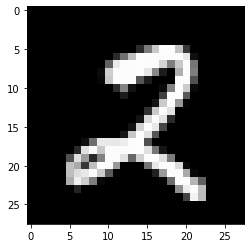

In [51]:
index = 2018

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 0)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))

# 과적합(Overfitting)을 해결하는 방법
* 학습 데이터에 모델이 과적합되는 현상은 모델의 성능을 떨어트리는 주요 이슈임 
* 모델이 과적합되면 훈련 데이터에 대한 정확도는 높을지라도, 새로운 데이터. 즉, 검증 데이터나 테스트 데이터에 대해서는 제대로 동작하지 않음
* 이는 모델이 학습 데이터를 불필요할정도로 과하게 암기하여 훈련 데이터에 포함된 노이즈까지 학습한 상태라고 해석할 수 있음
* 인공신경망에서 과적합을 막는 방법을 소개함

## 1.데이터 양 늘리기
* 모델은 데이터의 양이 적을 경우, 해당 데이터의 특정 패턴이나 노이즈까지 쉽게 암기하기 되므로 과적합 현상이 발생할 확률이 늘어납니다. 그렇기 때문에 데이터의 양을 늘릴 수록 모델은 데이터의 일반적인 패턴을 학습하여 과적합을 방지할 수 있습니다.

만약, 데이터의 양이 적을 경우에는 의도적으로 기존의 데이터를 조금씩 변형하고 추가하여 데이터의 양을 늘리기도 하는데 이를 데이터 증식 또는 증강(Data Augmentation)이라고 합니다. 이미지의 경우에는 데이터 증식이 많이 사용되는데 이미지를 돌리거나 노이즈를 추가하고, 일부분을 수정하는 등으로 데이터를 증식시킵니다.

## 2. 모델 복잡도 줄이기
* 인공 신경망의 복잡도는 은닉층(hidden layer)의 수나 매개변수의 수 등으로 결정됨
* 과적합 현상이 포착되었을 때, 인공 신경망 모델에 대해서 할 수 있는 한 가지 조치는 인공 신경망의 복잡도를 줄이는 것임

In [58]:
class Architecture1(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Architecture1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu = nnReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [59]:
#2개의 선형 레이어로 레이어 축소
class Architecture1(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Architecture1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

## 3. 가중치 규제(Regularization) 적용하기
* 복잡한 모델이 간단한 모델보다 과적합될 가능성이 높음
* 복잡한 모델을 좀 더 간단하게 하는 방법으로 가중치 규제(Regularizaiton)가 있음
    * L1 규제 : 가중치 w들의 절대값 합계를 비용 함수에 추가합니다. L1 노름이라고도 합니다.
    * L2 규제 : 모든 가중치 w들의 제곱합을 비용 함수에 추가합니다. L2 노름이라고도 합니다.
    * L1 규제는 기존의 비용 함수에 모든 가중치에 대해서 $\lambda \mid w \mid$를 더 한 값을 비용 함수로 하고, L2 규제는 기존의 비용 함수에 모든 가중치에 대해서 $\frac{1}{2} \lambda w^2$를 더 한 값을 비용 함수로 함
    * 여기서 $\lambda$는 규제의 강도를 정하는 하이퍼파라미터로, 크다면 모델이 훈련 데이터에 대해서 적합한 매개 변수를 찾는 것보다 규제를 위해 추가된 항들을 작게 유지하는 것을 우선한다는 의미

* 두 가지 규제 모두 비용 함수를 최소화하기 위해서는 가중치 w들의 값이 작아져야 한다는 특징이 있음
* L1 규제로 예를 들어봅시다. L1 규제를 사용하면 비용 함수가 최소가 되게 하는 가중치와 편향을 찾는 동시에 가중치들의 절대값의 합도 최소가 되어야 합니다. 이렇게 되면, 가중치 w의 값들은 0 또는 0에 가까이 작아져야 하므로 어떤 특성들은 모델을 만들 때 거의 사용되지 않게 됨

* 파이토치에서는 옵티마이저의 weight_decay 매개변수를 설정하므로서 L2 규제를 적용할 수 있음(weight_decay 기본값은 0)

In [60]:
model = Architecture1(10, 20, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

## 4. 드롭아웃(Dropout)
* 드롭아웃은 학습 과정에서 신경망의 일부를 사용하지 않는 방법
![img](https://pbs.twimg.com/media/Du42CMeUYAAJufd.jpg)
![img](https://wikidocs.net/images/page/60751/%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83.PNG)

* 학습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지해주고, 매번 랜덤 선택으로 뉴런들을 사용하지 않으므로 서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 내어 과적합을 방지

# 기울기 소실(Gradient Vanishing)과 폭주(Exploding)
* 역전파 과정에서 입력층으로 갈 수록 기울기(Gradient)가 점차적으로 작아지는 현상이 발생 (기울기 소실: Gradient Vanishing)
* 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 결국 발산(기울기 폭주: Gradient Exploding)

## 1. 활성화 함수 ReLU, ReakyReLU
* 시그모이드 함수를 사용하는 경우 기울기가 소실되는 문제가 있었음

## 2. 가중치 초기화
* 같은 모델을 훈련시키더라도 가중치가 초기에 어떤 값을 가졌느냐에 따라서 모델의 훈련 결과가 달라지기도 함(가중치 초기화만 적절히 해줘도 기울기 소실 문제를 완화)
* 1. 세이비어 초기화
     * 2010년 세이비어 글로럿과 요슈아 벤지오는 가중치 초기화가 모델에 미치는 영향을 분석하여 새로운 초기화 방법을 제안했음
     * 이 방법은 제안한 사람의 이름을 따서 __세이비어(Xavier Initialization) 초기화__라고 함
     * 이 방법은 균등 분포(Uniform Distribution) 또는 정규 분포(Normal distribution)로 초기화 할 때 두 가지 경우로 나뉘며, 이전 층의 뉴런 개수와 다음 층의 뉴런 개수를 가지고 식을 세움
     * 균등 분포를 사용하여 초기화 할 경우,
     $$ W \sim Uniform(-\sqrt{\frac{6}{ {n}_{in} + {n}_{out} }}, +\sqrt{\frac{6}{ {n}_{in} + {n}_{out} }}) $$
     * 세이비어 초기화는 여러 층의 기울기 분산 사이에 균형을 맞춰서 특정 층이 너무 주목을 받거나 다른 층이 뒤쳐지는 것을 막음
     * 세이비어 초기화는 시그모이드 함수나 하이퍼볼릭 탄젠트 함수와 같은 S자 형태인 활성화 함수와 함께 사용할 경우에는 좋은 성능을 보이지만, ReLU와 함께 사용할 경우에는 성능이 좋지 않음
     * ReLU 함수 또는 ReLU의 변형 함수들을 활성화 함수로 사용할 경우에는 다른 초기화 방법을 사용하는 것이 좋은데, 이를 __He 초기화(He initialization)__라고 함
     
* 2. HE 초기화
    * 세이비어랑 유사하나 다음 층의 뉴런의 수를 반영하지 않음
    $$W\sim Uniform(- \sqrt{\frac { 6 }{ { n }_{ in } } } , \space\space + \sqrt{\frac { 6 }{ { n }_{ in } } } )$$
    * 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용할 경우에는 세이비어 초기화 방법이 효율적
    * ReLU 계열 함수를 사용할 경우에는 He 초기화 방법이 효율적


In [61]:
# nn layers
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()

# Xavier initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

Parameter containing:
tensor([[-0.1430,  0.1348, -0.0572,  ...,  0.0947, -0.0364,  0.0021],
        [ 0.0440,  0.0786, -0.0142,  ..., -0.0941, -0.1386,  0.0833],
        [-0.0906,  0.0026,  0.1323,  ...,  0.0378, -0.1111, -0.0634],
        ...,
        [ 0.0641,  0.1183,  0.0827,  ...,  0.0386, -0.0998, -0.0432],
        [ 0.0774, -0.0392, -0.0573,  ..., -0.0440,  0.0818,  0.1077],
        [-0.1232,  0.0540,  0.0363,  ...,  0.0879, -0.1359,  0.1266]],
       requires_grad=True)

In [63]:
# HE initialization
torch.nn.init.kaiming_uniform_(linear1.weight)
torch.nn.init.kaiming_uniform_(linear2.weight)
torch.nn.init.kaiming_uniform_(linear3.weight)

Parameter containing:
tensor([[ 0.1212,  0.0615, -0.0949,  ...,  0.0084,  0.1052,  0.0797],
        [ 0.0451, -0.1221,  0.0124,  ...,  0.1040,  0.1510,  0.1035],
        [-0.1032, -0.1191,  0.1069,  ..., -0.1301,  0.1321, -0.0617],
        ...,
        [-0.0613, -0.1382, -0.0865,  ..., -0.0806, -0.1394,  0.0266],
        [-0.0936,  0.0856, -0.0184,  ..., -0.1202, -0.0792, -0.1105],
        [ 0.0024, -0.1458,  0.1389,  ..., -0.1142,  0.0249, -0.0005]],
       requires_grad=True)

## 배치 정규화(Batch Normalization)
* ReLU 계열의 함수와 He 초기화를 사용하는 것만으로도 어느 정도 기울기 소실과 폭주를 완화시킬 수 있지만, 이 두 방법을 사용하더라도 훈련 중에 언제든 다시 발생할 수 있음
* 울기 소실이나 폭주를 예방하는 또 다른 방법은 배치 정규화(Batch Normalization)임
* 배치 정규화는 인공 신경망의 각 층에 들어가는 입력을 __평균과 분산으로 정규화__하여 학습을 효율적으로 만듬
* 배치 정규화는 배치 단위로 정규화하는 것을 말하며, 각 층에서 활성화 함수를 통과하기 전에 수행됨
* 입력에 대해 평균을 0으로 만들고, 정규화를 함
Input: 미니배치 $B = \{{x}^{(1)}, {x}^{(2)}, ..., {x}^{(m)}\}$
Output: $y^{(i)} = BN_{γ, β}(x^{(i)})$
$$ μ_{B} ← \frac{1}{m} \sum_{i=1}^{m} x^{(i)} \text{ # 미니 배치에 대한 평균}$$
$$σ^{2}_{B} ← \frac{1}{m} \sum_{i=1}^{m} (x^{(i)} - μ_{B})^{2}\text{ # 미니 배치에 대한 분산}$$
$$\hat{x}^{(i)} ← \frac{x^{(i)} - μ_{B}}{\sqrt{σ^{2}_{B}+ε}}\text{ # 정규화}$$
$$y^{(i)} ← γ\hat{x}^{(i)} + β = BN_{γ, β}(x^{(i)}) \text{ # 스케일 조정과 시프트}$$
* $ε$은 분모가 0이 되는 것을 막는 작은 수. 보편적으로 $10^{-5}$
* $γ$는 정규화 된 데이터에 대한 스케일 매개변수로 학습 대상
* $β$는 정규화 된 데이터에 대한 시프트 매개변수로 학습 대상

* 배치 정규화는 학습 시 배치 단위의 평균과 분산들을 차례대로 받아 이동 평균과 이동 분산을 저장해놓았다가 테스트 할 때는 해당 배치의 평균과 분산을 구하지 않고 구해놓았던 평균과 분산으로 정규화

* 장점
    * 시그모이드나, 하이퍼볼릭탄젠트의 기울기 소실 문제 개선
    * 가중치 초기화에 훨씬 덜 민감
    * 훨씬 큰 학습률을 사용할 수 있어 학습 속도 개선
* 단점
    *  모델을 더 복잡하게 함
    *  추가 계산이 필요하므로 테스트 예측 시에도 시간이 느려짐

In [64]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(28*28, 32, bias=True).to(device)
        self.linear2 = nn.Linear(32, 32, bias=True).to(device)
        self.linear3 = nn.Linear(32, 10, bias=True).to(device)
        self.relu = torch.nn.ReLU()
        self.bn1 = nn.BatchNorm1d(32)
        self.bn2 = nn.BatchNorm1d(32)
        
        torch.nn.init.xavier_uniform_(self.linear1.weight)
        torch.nn.init.xavier_uniform_(self.linear2.weight)
        torch.nn.init.xavier_uniform_(self.linear3.weight)
        
        self.model = nn.Sequential(self.linear1, self.bn1, self.relu,
                                   self.linear2, self.bn2, self.relu,
                                   self.linear3).to(device)
    
    def forward(self, x):
        return self.model(x)

## 층 정규화(Layer Normalization)
* 층 정규화를 이해하기에 앞서 배치 정규화를 시각화해보겠습니다. 다음은 $m$이 3이고, 특성의 수가 4일 때의 배치 정규화를 보여줌
* 미니 배치란 동일한 특성(feature) 개수들을 가진 다수의 샘플들을 의미함
* 배치 정규화
![img](https://wikidocs.net/images/page/61375/%EB%B0%B0%EC%B9%98%EC%A0%95%EA%B7%9C%ED%99%94.PNG)
* 층 정규화
![img](https://wikidocs.net/images/page/61375/%EC%B8%B5%EC%A0%95%EA%B7%9C%ED%99%94.PNG)

In [65]:
lass block(nn.Module):
    def __init__(self, in_channel, out_channels):
        super(block, self).__init__()
        ln = nn.GroupNorm(1, in_channel, eps=1e-08)
        ...
    def forward(self,x):
        out = ln(x)  #[B, N, T] -> [B, N, T]

SyntaxError: invalid syntax (<ipython-input-65-21487a4a9fc5>, line 1)